To Predict the selling price of Car

In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
df= pd.read_csv("car_data.csv")

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
print("Number of Car_Name present in dataset " + str(df['Car_Name'].nunique()))
print("Name of Car present in dataset ",end="")
print(df['Car_Name'].unique())
print("Types of Car Fuel Type ",end="")
print(df['Fuel_Type'].unique())
print("Types of Seller Type ",end="")
print(df['Seller_Type'].unique())
print("Types of Transmission Type ",end="")
print(df['Transmission'].unique())
print("Types of Owner ",end="")
print(df['Owner'].unique())

Number of Car_Name present in dataset 98
Name of Car present in dataset ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' '

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
f_dataset=df.drop(columns=['Car_Name'])

In [ ]:
f_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
f_dataset['current_year']=int(str(date.today())[0:4])
f_dataset['No_of_years_old']=f_dataset['current_year']-f_dataset['Year']

In [ ]:
f_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,No_of_years_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [ ]:
f_dataset.drop(columns=['Year','current_year'],axis=1,inplace=True)

In [ ]:
f_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [ ]:
f_dataset=pd.get_dummies(f_dataset,drop_first=True)  #One Hot Encoding

In [ ]:
f_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [ ]:
f_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Selling_Price           301 non-null    float64
 1   Present_Price           301 non-null    float64
 2   Kms_Driven              301 non-null    int64  
 3   Owner                   301 non-null    int64  
 4   No_of_years_old         301 non-null    int64  
 5   Fuel_Type_Diesel        301 non-null    uint8  
 6   Fuel_Type_Petrol        301 non-null    uint8  
 7   Seller_Type_Individual  301 non-null    uint8  
 8   Transmission_Manual     301 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


In [ ]:
f_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years_old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


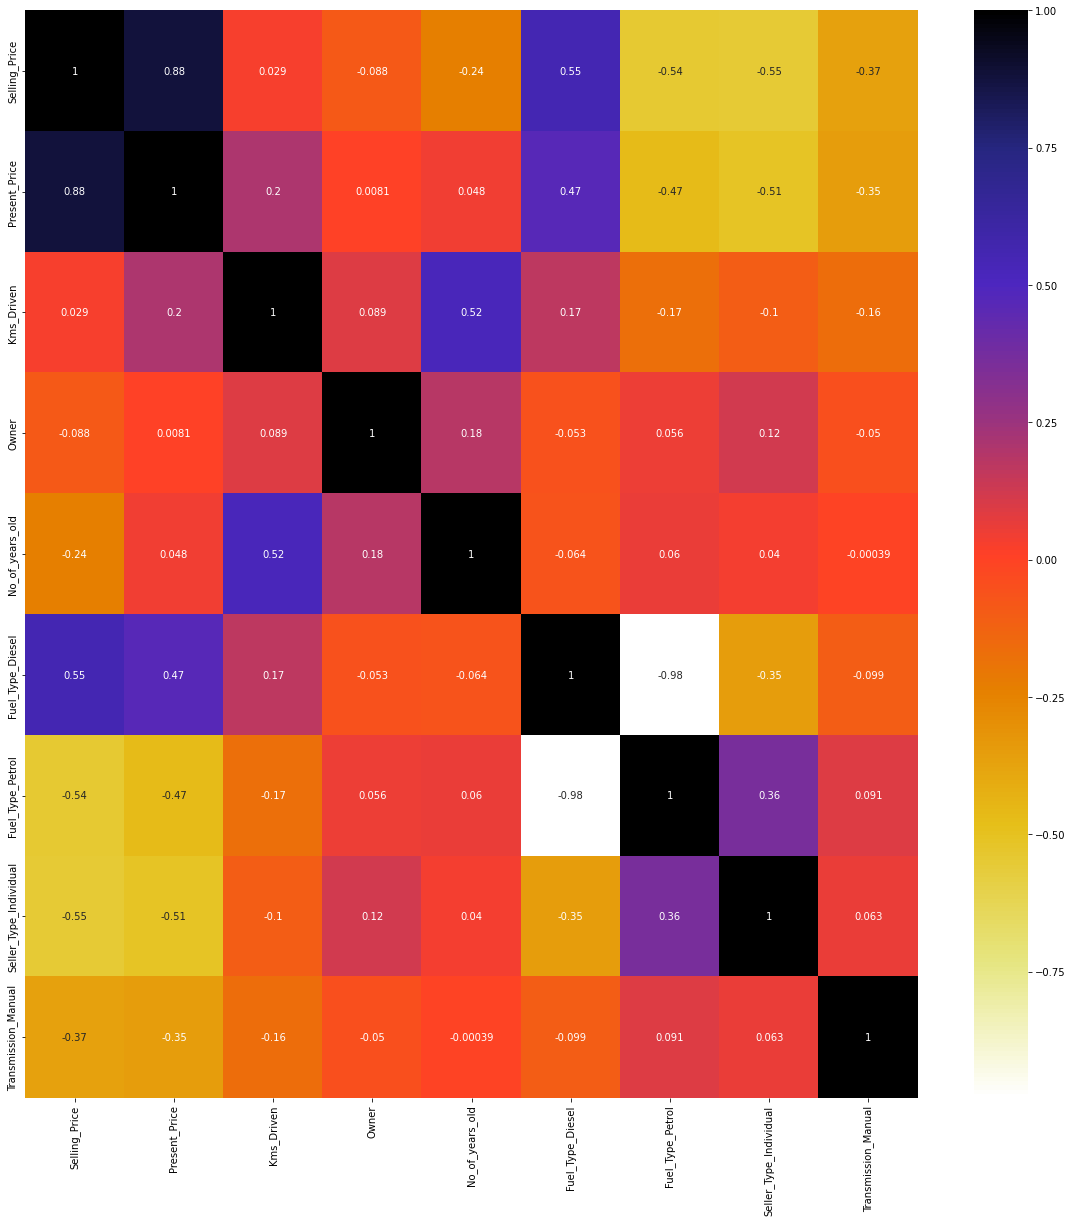

In [ ]:
corr_matrix= f_dataset.corr()
features= corr_matrix.index
plt.figure(figsize=(20,20))
plot=sns.heatmap(corr_matrix,annot=True,cmap='CMRmap_r')

In [ ]:
y=f_dataset['Selling_Price']
x=f_dataset.drop(columns=['Selling_Price'])

In [ ]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [ ]:
x.head()

,Present_Price,Kms_Driven,Owner,No_of_years_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
model= ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.40162066 0.0394914  0.00079486 0.07794495 0.21693524 0.01241652
 0.10857307 0.14222331]


[]

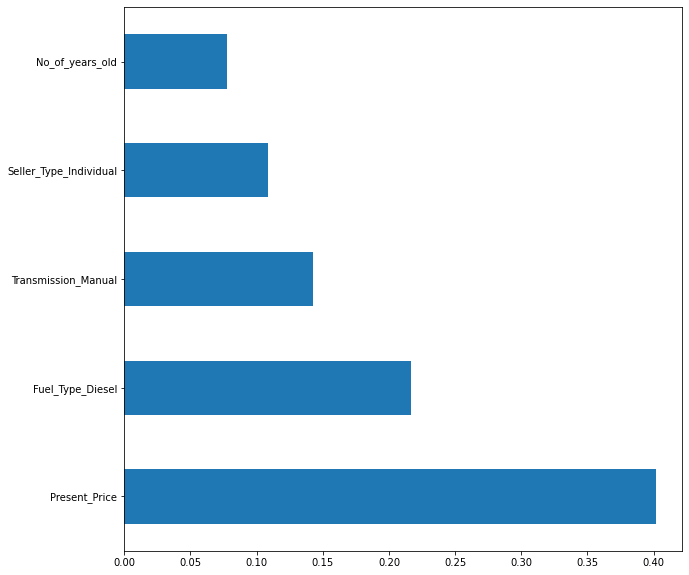

In [ ]:
important_feature= pd.Series(model.feature_importances_,index=x.columns)
plt.figure(figsize=(10,10))
important_feature.nlargest(5).plot(kind='barh')
plt.plot()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(240, 8) (61, 8) (240,) (61,)


In [ ]:
n_estimators=[i for i in range(100,1100,100)]
print(n_estimator)
max_features=['auto','sqrt']
max_depth=[i for i in range(5,30,5)]
min_samples_split= [2,4,6,10,100]
min_samples_leaf=[2,3,4,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [ ]:
parameters= {'n_estimators': n_estimators,
             'max_features':max_feature,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [ ]:
model1= RandomForestRegressor()

In [ ]:
random_CV= RandomizedSearchCV(estimator=model1,param_distributions=parameters,n_iter=10,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=2)
random_CV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=6, n

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 10],
                                        'min_samples_split': [2, 4, 6, 10, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=2, scoring='neg_mean_squared_error', verbose=2)

In [ ]:
random_CV.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 25}

In [ ]:
y_predict=random_CV.predict(x_test)

[]

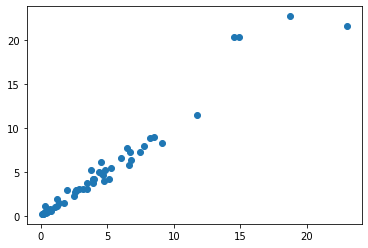

In [ ]:
plt.scatter(y_test,y_predict)
plt.plot()

In [ ]:
y_predict_train= random_CV.predict(x_train)

In [ ]:
train_error= mean_squared_error(y_train,y_predict_train)
print(train_error)
test_error= mean_squared_error(y_test,y_predict)
print(test_error)

0.7293385443589581
1.6029768510679963


In [ ]:
pickle.dump(random_CV,open('Car_prediction.pkl','wb'))

In [ ]:
model= pickle.load(open('Car_prediction.pkl','rb'))

In [ ]:
Present_Price=float('201.998')

In [ ]:
p=model.predict([[Present_Price,1,1,2,0,1,0,1]])
print(p[0])

28.61706017195768


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print(p[0])

28.61706017195768
